In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib import colors
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

The network is simple.

1. The input is has two dimensions.
2. There is one hidden layer with two nodes. The activation at these nodes is tanh.
3. The output is a single node with a sigmoid activation.

The weights are as follows:

1. Weights from x to the tanh nodes are v1 and v2.
2. The weights from tanh nodes to sigmoid is w.

In [2]:
def classify(x, v1, v2, w):
    z1 = np.tanh(v1[0]+np.dot(x, v1[1:]))
    #print(z1)
    z2 = np.tanh(v2[0]+np.dot(x, v2[1:]))
    #print(z2)
    y = 1./(1+np.exp(-w[0]-np.dot(w[1:], [z1, z2])))
    return y

In [31]:
# X = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
# t = [0, 1, 1, 0]

X=[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2], [1, 3], [2, 3], [3, 3], [4, 1], [4, 2], [4, 3]]
t=[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [32]:
def plot_data(X, t, ax):
    for i in range(len(X)):
        if t[i] == 1:
            ax.plot(X[i][0], X[i][1], 'o', color='blue', markersize=20)
        else:
            ax.plot(X[i][0], X[i][1], 'o', color='red', markersize=20)

In [33]:
def set_spines(ax):
    # set the spine locations
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # turn off the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.grid(True, which='both')    

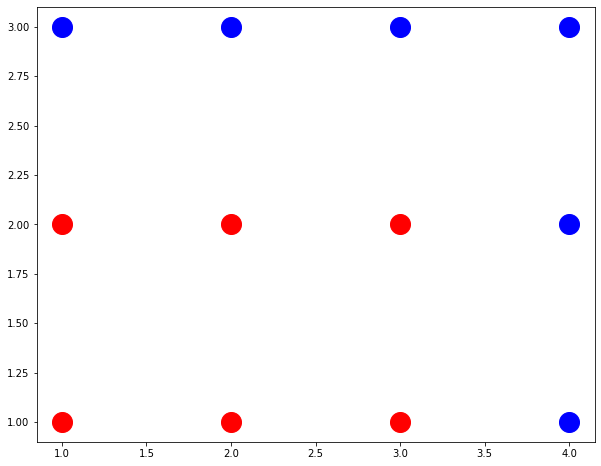

In [35]:
fig, ax = plt.subplots()

plot_data(X, t, ax)
#set_spines(ax)

In [36]:
nx = ny = 200
x_min = y_min = -1
x_max = y_max = 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
D=np.c_[xx.ravel(), yy.ravel()]

In [37]:
rs = np.random.RandomState(42)

In [38]:
v1 = 2*rs.random(3)-1
v2 = 2*rs.random(3)-1
w = 2*rs.random(3)-1

In [39]:
p=np.array([classify(d, v1, v2, w) for d in D])
p=p.reshape(xx.shape)

In [40]:
def plot_data_and_mesh(X, t, p, ax):
    
    plot_data(X, t, ax)
    ax.pcolormesh(xx, yy, p, cmap=plt.cm.RdBu, shading='nearest',
                   norm=colors.Normalize(0., 1.))

    ax.contour(xx, yy, p, [0.5], linewidths=2., colors='k')

    

C:\Users\mbilg\AppData\Local\Temp\ipykernel_16148\591203598.py:7: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, p, [0.5], linewidths=2., colors='k')


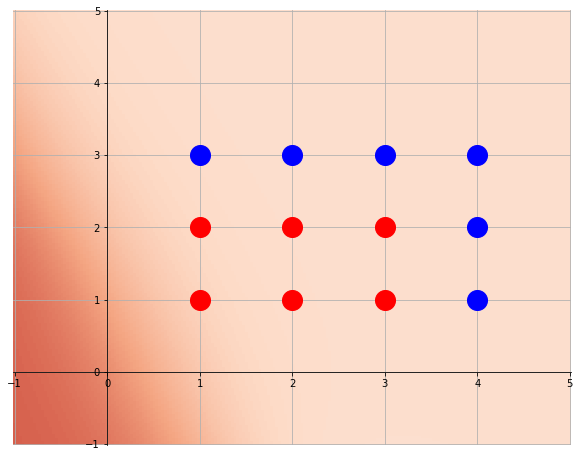

In [41]:
fig, ax = plt.subplots()
plot_data_and_mesh(X, t, p, ax)
set_spines(ax)

In [42]:
loss_history = []

In [63]:
lr = 0.0075
epochs = 1000
for _ in range(epochs):
    loss = 0
    for i in range(len(X)):
        x=X[i]
        # feedforward
        z1 = np.tanh(v1[0]+np.dot(x, v1[1:]))
        z2 = np.tanh(v2[0]+np.dot(x, v2[1:]))
        y = 1./(1+np.exp(-w[0]-np.dot(w[1:], [z1, z2])))
        # backward
        y_error = (1-t[i])*y - t[i]*(1-y)
        loss -= (1-t[i])*np.log(1-y) + t[i]*np.log(y)
        #print(y_error)
        #print()
        z1_error = y_error*w[1]*(1-z1)*(1+z1)
        z2_error = y_error*w[2]*(1-z2)*(1+z2)
        # update weights
        w[0] = w[0] - lr*y_error*1
        w[1] = w[1] - lr*y_error*z1
        w[2] = w[2] - lr*y_error*z2
        v1[0] = v1[0] - lr*z1_error*1
        v1[1] = v1[1] - lr*z1_error*x[0]
        v1[2] = v1[2] - lr*z1_error*x[1]
        v2[0] = v2[0] - lr*z2_error*1
        v2[1] = v2[1] - lr*z2_error*x[0]
        v2[2] = v2[2] - lr*z2_error*x[1]
    loss_history.append(loss)
print("Final Loss: \t%0.3f" %loss)

Final Loss: 	0.498


Text(0, 0.5, 'Loss')

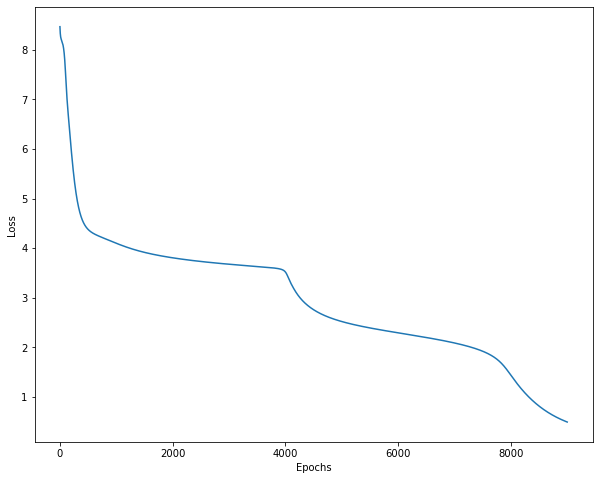

In [64]:
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")

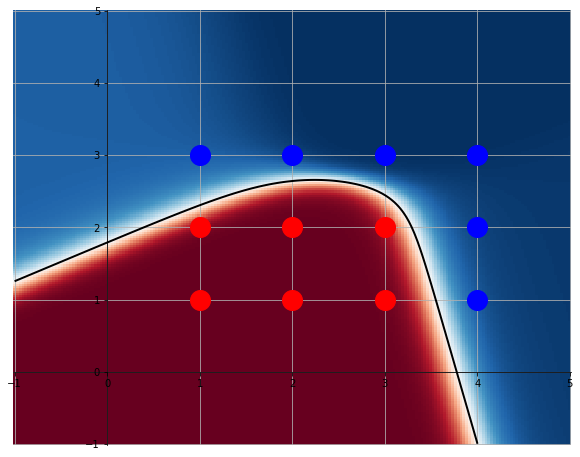

In [65]:
p=np.array([classify(d, v1, v2, w) for d in D])
p=p.reshape(xx.shape)

fig, ax = plt.subplots()
plot_data_and_mesh(X, t, p, ax)
set_spines(ax)

In [ ]:
v1

In [ ]:
v2

In [ ]:
w

# MLP Classifier

In [ ]:
X=[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2], [1, 3], [2, 3], [3, 3], [4, 1], [4, 2], [4, 3]]
t=[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [ ]:
fig, ax = plt.subplots()
plot_data(X, t, ax)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(5, 5), solver='lbfgs', activation='tanh', batch_size=1, shuffle=True)

In [ ]:
clf.fit(X, t)

In [ ]:
nx = ny = 200
x_min = y_min = -1
x_max = y_max = 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
D=np.c_[xx.ravel(), yy.ravel()]

In [ ]:
p=clf.predict_proba(D)
p=p[:, 1]
p=p.reshape(xx.shape)

In [ ]:
p.shape

In [ ]:
fig, ax = plt.subplots()
plot_data_and_mesh(X, t, p, ax)
#set_spines(ax)